In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#read csv, print 5 rows
klangapi = pd.read_csv('klangapiraw.csv',encoding='latin1')
klangapi.head()

,Full_Date,Month,Years,Site_Id,Site_Location,Date,Time,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,...,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg,API_Main,PM2.5 1H (µg/m3)
0,1/1/2002,January,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20020101,100,2.6,355.0,26.9,...,NaN,0.088,0.043,0.009,0.045,0.005,2.16,94,54.0,NaN
1,1/1/2002,January,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20020101,200,3.0,34.0,26.7,...,NaN,0.066,0.026,0.009,0.04,0.005,1.98,102,55.0,NaN
2,1/1/2002,January,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20020101,300,3.2,54.0,26.1,...,NaN,0.052,0.016,0.007,0.036,0.006,1.68,110,55.0,NaN
3,1/1/2002,January,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20020101,400,2.9,113.0,25.5,...,NaN,0.057,0.02,0.007,0.037,0.002,1.68,102,56.0,NaN
4,1/1/2002,January,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20020101,500,3.9,91.0,25.0,...,NaN,0.052,0.016,0.007,0.036,0.002,1.67,96,57.0,NaN


In [63]:
klangapi.shape

(160260, 21)

In [64]:
print(klangapi[klangapi['Humidity_hourly_avg'].isnull()].index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### SELECT APPROPRIATE ROWS

In [65]:
#30/9/2002 is the date where the value of the relative humidity exist.
#Hence we need to remove rows before the date 30/9/2002 as it has incomplete data
#Access the last index of 30/9/2002 from the data which is 6551
klangapi[klangapi['Full_Date'] == '30/9/2002'].index[-1]

6551

In [66]:
#Then remove all of the data from the 1 to 6551 index
#Used .copy() to avoid warnings
klangapiSelRows = klangapi.iloc[6552:].copy().reset_index(drop=True)

klangapiSelRows.head(15)

,Full_Date,Month,Years,Site_Id,Site_Location,Date,Time,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,...,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg,API_Main,PM2.5 1H (µg/m3)
0,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,100,1.0,359.0,22.6,...,89,0.107,0.074,0.009,0.033,0.001,3.75,142,64.0,NaN
1,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,200,1.0,356.0,22.3,...,90,0.1,0.068,0.01,0.032,0.001,3.49,136,66.0,NaN
2,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,300,1.2,11.0,22.3,...,90,0.07,0.042,0.007,0.028,0.001,2.98,144,69.0,NaN
3,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,400,0.9,349.0,22.2,...,90,0.065,0.042,0.005,0.023,0.001,2.84,146,72.0,NaN
4,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,500,0.5,333.0,22.0,...,92,0.078,0.057,0.006,0.021,0.001,2.91,118,74.0,NaN
5,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,600,0.9,354.0,22.1,...,92,0.071,0.052,0.004,0.019,0.001,2.91,122,76.0,NaN
6,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,700,0.8,87.0,22.1,...,92,0.152,0.129,0.01,0.023,0.002,3.69,136,78.0,NaN
7,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,800,1.1,25.0,22.7,...,89,0.276,0.248,0.022,0.028,0.002,7.07,215,82.0,NaN
8,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,900,1.9,92.0,24.8,...,77,0.125,0.079,0.039,0.046,0.004,4.53,150,83.0,NaN
9,1/10/2002,October,2002,CA0011,"Sek. Men. (P) Raja Zarina, Kelang ...",20021001,1000,2.7,76.0,28.8,...,67,0.058,0.01,0.031,0.048,0.024,2.2,49,82.0,NaN


### DROP UNECESSARY COLUMNS

In [67]:
klangapiSelRows.drop(columns=['UVB_hourly_avg','PM2.5 1H (µg/m3)','API_Main','Full_Date','Month','Years','Site_Id','Site_Location','Time'], inplace = True)

klangapiSelRows.shape

(153708, 12)

### DEALING WITH MISSING DATA

In [68]:
#Check missing data
klangapiSelRows.isnull().sum()

Date                       0
Ws_hourly_avg          34914
Wd_hourly_avg          16951
Amb_temp_hourly_avg     7376
Humidity_hourly_avg       71
Nox_hourly_avg          1632
No_hourly_avg           1632
So2_hourly_avg          1451
No2_hourly_avg          1613
O3_hourly_avg           1306
Co_hourly_avg           1338
Pm10_hourly_avg          194
dtype: int64

In [69]:
#Change the incorrect datatype to the correct datatype
klangapiSelRows["Humidity_hourly_avg"] = pd.to_numeric(klangapiSelRows.Humidity_hourly_avg, errors='coerce')
klangapiSelRows["Nox_hourly_avg"] = pd.to_numeric(klangapiSelRows.Nox_hourly_avg, errors='coerce')
klangapiSelRows["No_hourly_avg"] = pd.to_numeric(klangapiSelRows.No_hourly_avg, errors='coerce')
klangapiSelRows["So2_hourly_avg"] = pd.to_numeric(klangapiSelRows.So2_hourly_avg, errors='coerce')
klangapiSelRows["No2_hourly_avg"] = pd.to_numeric(klangapiSelRows.No2_hourly_avg, errors='coerce')
klangapiSelRows["O3_hourly_avg"] = pd.to_numeric(klangapiSelRows.O3_hourly_avg, errors='coerce')
klangapiSelRows["Co_hourly_avg"] = pd.to_numeric(klangapiSelRows.Co_hourly_avg, errors='coerce')
klangapiSelRows["Pm10_hourly_avg"] = pd.to_numeric(klangapiSelRows.Pm10_hourly_avg, errors='coerce')

<AxesSubplot:>

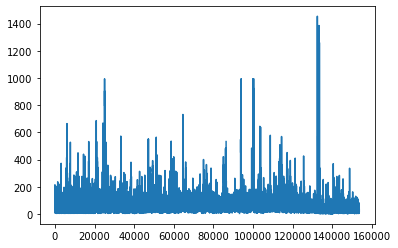

In [70]:
pm10 = klangapiSelRows['Pm10_hourly_avg']

pm10.plot()

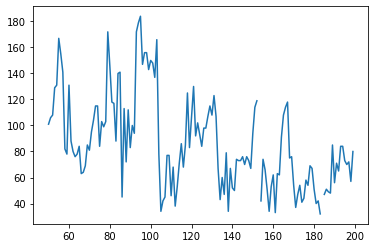

In [72]:
plt.plot(pm10[50:200])


C:\Users\faiz_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

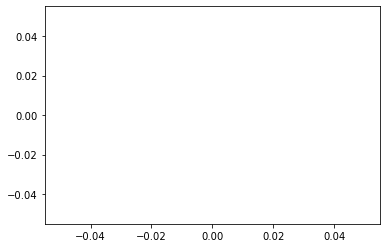

In [58]:
sns.lineplot(pm10)

In [46]:
#Check data(datatype)
klangapiSelRows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153708 entries, 0 to 153707
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 153708 non-null  int64  
 1   Ws_hourly_avg        118794 non-null  float64
 2   Wd_hourly_avg        136757 non-null  float64
 3   Amb_temp_hourly_avg  146332 non-null  float64
 4   Humidity_hourly_avg  147367 non-null  float64
 5   Nox_hourly_avg       138680 non-null  float64
 6   No_hourly_avg        138680 non-null  float64
 7   So2_hourly_avg       142804 non-null  float64
 8   No2_hourly_avg       138696 non-null  float64
 9   O3_hourly_avg        139840 non-null  float64
 10  Co_hourly_avg        140966 non-null  float64
 11  Pm10_hourly_avg      150624 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 14.1 MB


In [47]:
#Check missing data
klangapiSelRows.isnull().sum()

Date                       0
Ws_hourly_avg          34914
Wd_hourly_avg          16951
Amb_temp_hourly_avg     7376
Humidity_hourly_avg     6341
Nox_hourly_avg         15028
No_hourly_avg          15028
So2_hourly_avg         10904
No2_hourly_avg         15012
O3_hourly_avg          13868
Co_hourly_avg          12742
Pm10_hourly_avg         3084
dtype: int64

In [48]:
#percentage of missing data
#16951/153708*100 = 11.028053191766206
#7376/153708*100 = 4.798709240898327
#6341/153708*100 = 4.125354568402425
#531/153708*100 = 0.3454602232805059
#34914/153708*100 = 22.71449761886174

In [14]:
#linear interpolation 
#fill in missing data
klangapiSelRows.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [15]:
#Check missing data
klangapiSelRows.isnull().sum()

Date                   0
Ws_hourly_avg          0
Wd_hourly_avg          0
Amb_temp_hourly_avg    0
Humidity_hourly_avg    0
Nox_hourly_avg         0
No_hourly_avg          0
So2_hourly_avg         0
No2_hourly_avg         0
O3_hourly_avg          0
Co_hourly_avg          0
Pm10_hourly_avg        0
dtype: int64

In [16]:
klangapiSelRows.head()

,Date,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg
0,20021001,1.0,359.0,22.6,89.0,0.107,0.074,0.009,0.033,0.001,3.75,142.0
1,20021001,1.0,356.0,22.3,90.0,0.100,0.068,0.010,0.032,0.001,3.49,136.0
2,20021001,1.2,11.0,22.3,90.0,0.070,0.042,0.007,0.028,0.001,2.98,144.0
3,20021001,0.9,349.0,22.2,90.0,0.065,0.042,0.005,0.023,0.001,2.84,146.0
4,20021001,0.5,333.0,22.0,92.0,0.078,0.057,0.006,0.021,0.001,2.91,118.0


In [17]:
klangapiSelRows['Date'] = pd.to_datetime(klangapiSelRows['Date'], format='%Y%m%d')


In [18]:
klangapiSelRows

,Date,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg
0,2002-10-01,1.000,359.0,22.600,89.000,0.1070,0.0740,0.0090,0.0330,0.0010,3.750,142.000
1,2002-10-01,1.000,356.0,22.300,90.000,0.1000,0.0680,0.0100,0.0320,0.0010,3.490,136.000
2,2002-10-01,1.200,11.0,22.300,90.000,0.0700,0.0420,0.0070,0.0280,0.0010,2.980,144.000
3,2002-10-01,0.900,349.0,22.200,90.000,0.0650,0.0420,0.0050,0.0230,0.0010,2.840,146.000
4,2002-10-01,0.500,333.0,22.000,92.000,0.0780,0.0570,0.0060,0.0210,0.0010,2.910,118.000
...,...,...,...,...,...,...,...,...,...,...,...,...
153703,2020-12-31,1.772,206.0,28.779,80.241,0.0086,0.0009,0.0012,0.0077,0.0275,0.562,15.332
153704,2020-12-31,1.374,185.0,28.200,82.533,0.0177,0.0016,0.0011,0.0161,0.0164,0.620,21.630
153705,2020-12-31,1.243,105.0,27.643,83.318,0.0238,0.0017,0.0011,0.0220,0.0084,0.925,25.202
153706,2020-12-31,1.263,89.0,27.015,83.150,0.0352,0.0075,0.0012,0.0278,0.0036,1.166,29.169


In [19]:
klangapiSelRows.set_index('Date', inplace=True)
klangapiSelRows.head()

,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg
Date,,,,,,,,,,,
2002-10-01,1.0,359.0,22.6,89.0,0.107,0.074,0.009,0.033,0.001,3.75,142.0
2002-10-01,1.0,356.0,22.3,90.0,0.100,0.068,0.010,0.032,0.001,3.49,136.0
2002-10-01,1.2,11.0,22.3,90.0,0.070,0.042,0.007,0.028,0.001,2.98,144.0
2002-10-01,0.9,349.0,22.2,90.0,0.065,0.042,0.005,0.023,0.001,2.84,146.0
2002-10-01,0.5,333.0,22.0,92.0,0.078,0.057,0.006,0.021,0.001,2.91,118.0


In [20]:
klangapiDaily = klangapiSelRows.resample('D').mean()

In [21]:
klangapiDaily=klangapiDaily.round(4)

In [22]:
klangapiDaily

,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg
Date,,,,,,,,,,,
2002-10-01,4.2125,170.1875,27.3729,72.7500,0.0751,0.0409,0.0097,0.0342,0.0241,2.3044,108.6875
2002-10-02,4.9542,111.8750,27.4375,72.8333,0.0601,0.0247,0.0077,0.0354,0.0203,1.7673,108.3333
2002-10-03,5.0542,123.2083,26.8250,77.0833,0.0610,0.0261,0.0119,0.0349,0.0191,1.7481,99.9583
2002-10-04,3.6958,134.3750,26.4875,79.2500,0.0871,0.0506,0.0121,0.0366,0.0191,2.4892,116.6250
2002-10-05,4.4708,188.9167,26.4750,80.3333,0.0539,0.0305,0.0072,0.0234,0.0165,1.7731,94.9583
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.1170,122.5417,27.7175,83.7624,0.0158,0.0027,0.0009,0.0130,0.0223,0.6674,19.1635
2020-12-28,0.8107,179.2917,27.5274,86.2811,0.0281,0.0082,0.0012,0.0199,0.0159,0.8996,34.3774
2020-12-29,1.1680,162.0000,27.1210,87.1327,0.0247,0.0063,0.0011,0.0184,0.0133,0.8214,23.4586


In [23]:
klangapiDaily.isnull().sum()

Ws_hourly_avg          262
Wd_hourly_avg          262
Amb_temp_hourly_avg    262
Humidity_hourly_avg    262
Nox_hourly_avg         262
No_hourly_avg          262
So2_hourly_avg         262
No2_hourly_avg         262
O3_hourly_avg          262
Co_hourly_avg          262
Pm10_hourly_avg        262
dtype: int64

In [24]:
klangapiDaily.dropna(inplace=True)

In [25]:
#2002-01-01 to 2020-12-31 = 6940 days
#2002-01-01 to 2002-09-30 = 273 days
#273 days removed
#6940 - 273 = 6667 days
#So data train mesti ade 6667 rows
#tapi data from 14/4/2017 - 31/12/2017 takde, KIV
klangapiDaily

,Ws_hourly_avg,Wd_hourly_avg,Amb_temp_hourly_avg,Humidity_hourly_avg,Nox_hourly_avg,No_hourly_avg,So2_hourly_avg,No2_hourly_avg,O3_hourly_avg,Co_hourly_avg,Pm10_hourly_avg
Date,,,,,,,,,,,
2002-10-01,4.2125,170.1875,27.3729,72.7500,0.0751,0.0409,0.0097,0.0342,0.0241,2.3044,108.6875
2002-10-02,4.9542,111.8750,27.4375,72.8333,0.0601,0.0247,0.0077,0.0354,0.0203,1.7673,108.3333
2002-10-03,5.0542,123.2083,26.8250,77.0833,0.0610,0.0261,0.0119,0.0349,0.0191,1.7481,99.9583
2002-10-04,3.6958,134.3750,26.4875,79.2500,0.0871,0.0506,0.0121,0.0366,0.0191,2.4892,116.6250
2002-10-05,4.4708,188.9167,26.4750,80.3333,0.0539,0.0305,0.0072,0.0234,0.0165,1.7731,94.9583
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.1170,122.5417,27.7175,83.7624,0.0158,0.0027,0.0009,0.0130,0.0223,0.6674,19.1635
2020-12-28,0.8107,179.2917,27.5274,86.2811,0.0281,0.0082,0.0012,0.0199,0.0159,0.8996,34.3774
2020-12-29,1.1680,162.0000,27.1210,87.1327,0.0247,0.0063,0.0011,0.0184,0.0133,0.8214,23.4586


In [29]:
klangapiDaily.reset_index(inplace=True)

In [31]:
klangapiDaily

,date,wind_speed,wind_direction,temperature,relative_humidity,nox,no,so2,no2,o3,co,pm10
0,2002-10-01,4.2125,170.1875,27.3729,72.7500,0.0751,0.0409,0.0097,0.0342,0.0241,2.3044,108.6875
1,2002-10-02,4.9542,111.8750,27.4375,72.8333,0.0601,0.0247,0.0077,0.0354,0.0203,1.7673,108.3333
2,2002-10-03,5.0542,123.2083,26.8250,77.0833,0.0610,0.0261,0.0119,0.0349,0.0191,1.7481,99.9583
3,2002-10-04,3.6958,134.3750,26.4875,79.2500,0.0871,0.0506,0.0121,0.0366,0.0191,2.4892,116.6250
4,2002-10-05,4.4708,188.9167,26.4750,80.3333,0.0539,0.0305,0.0072,0.0234,0.0165,1.7731,94.9583
...,...,...,...,...,...,...,...,...,...,...,...,...
6400,2020-12-27,1.1170,122.5417,27.7175,83.7624,0.0158,0.0027,0.0009,0.0130,0.0223,0.6674,19.1635
6401,2020-12-28,0.8107,179.2917,27.5274,86.2811,0.0281,0.0082,0.0012,0.0199,0.0159,0.8996,34.3774
6402,2020-12-29,1.1680,162.0000,27.1210,87.1327,0.0247,0.0063,0.0011,0.0184,0.0133,0.8214,23.4586
6403,2020-12-30,1.2642,138.1250,27.5433,84.2922,0.0354,0.0121,0.0014,0.0233,0.0135,1.0505,26.0311


In [32]:
klangapiDaily.columns=['date','wind_speed','wind_direction','temperature','relative_humidity','nox','no','so2','no2','o3','co','pm10']

klangapiDaily.to_csv('klangapiCleanedDailyBaru.csv', encoding='utf-8',index=False)

In [808]:
klangapiDaily.loc['2013-06-25']

Ws_hourly_avg            5.475000
Wd_hourly_avg          166.166667
Amb_temp_hourly_avg     30.508333
Humidity_hourly_avg     67.458333
Nox_hourly_avg           0.004112
No_hourly_avg            0.004112
So2_hourly_avg           0.008000
No2_hourly_avg           0.000000
O3_hourly_avg            0.028208
Co_hourly_avg            5.306250
Pm10_hourly_avg        420.291667
Name: 2013-06-25 00:00:00, dtype: float64

In [563]:
#remove uvb, rh rows, year
#training/testing 2002-2018
#deployment 2019-2020, in stat verification
#gru:improvement lstm: get recurrent unit ,lstm

In [564]:
klangapiTrainTest=klangapiDaily.loc['2002-10-01':'2018-12-31'].copy()
klangapiVerify=klangapiDaily.loc['2019-01-01':'2020-12-31'].copy()

In [565]:
jumlahTrainNTest=klangapiTrainTest.shape[0]
jumlahVerification=klangapiVerifify.shape[0]
print(jumlahTrainNTest,jumlahVerification,jumlahTrainNTest+jumlahVerification)

5674 731 6405


In [610]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout


scaler = StandardScaler()
scaler = scaler.fit(klangapiDaily)
klangapiDailyScaled = scaler.transform(klangapiDaily)
klangapiDailyScaled.shape

(6405, 11)

In [612]:
trainTest = klangapiDailyScaled[0:5674]
trainTest.shape

(5674, 11)

In [613]:
verificationData = klangapiDailyScaled[5674:]
verificationData.shape

(731, 11)

In [823]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 3  # Number of past days we want to use to predict the future.


for i in range(n_past, len(trainTest) - n_future +1):
    trainX.append(trainTest[i - n_past:i, 0:klangapiDaily.shape[1]])
    trainY.append(trainTest[i + n_future - 1:i + n_future, 10]) #pm10

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (5671, 3, 11).
trainY shape == (5671, 1).


In [814]:
klangapiDailyScaled[0:6]

array([[-0.29808073, -0.07212762, -0.78048208,  0.0261939 ,  2.65060726,
         2.50882226,  2.02474933,  2.04415232,  0.99750435,  3.13988074,
         1.4662431 ],
       [ 0.02114644, -1.14995312, -0.73575432,  0.03743453,  1.63255918,
         0.90707783,  1.27105704,  2.22349995,  0.44446885,  1.84884824,
         1.45533421],
       [ 0.06418637, -0.94047282, -1.15983723,  0.61093602,  1.69364206,
         1.04550019,  2.85381085,  2.14877177,  0.26982606,  1.80269701,
         1.1973953 ],
       [-0.52046806, -0.73407189, -1.39351557,  0.90331383,  3.46504573,
         3.46789145,  2.92918008,  2.40284758,  0.26982606,  3.5840863 ,
         1.71070759],
       [-0.18690859,  0.27405561, -1.40217032,  1.04949599,  1.21176597,
         1.48054189,  1.08263397,  0.43002363, -0.10856665,  1.86278975,
         1.04340193],
       [-0.25323313, -0.58081135, -1.67912242,  1.33063317,  0.75025084,
         0.72910623,  1.15800319,  0.54958872,  0.42991529,  1.35849145,
         0.696

In [815]:
trainX[1]

array([[ 0.02114644, -1.14995312, -0.73575432,  0.03743453,  1.63255918,
         0.90707783,  1.27105704,  2.22349995,  0.44446885,  1.84884824,
         1.45533421],
       [ 0.06418637, -0.94047282, -1.15983723,  0.61093602,  1.69364206,
         1.04550019,  2.85381085,  2.14877177,  0.26982606,  1.80269701,
         1.1973953 ],
       [-0.52046806, -0.73407189, -1.39351557,  0.90331383,  3.46504573,
         3.46789145,  2.92918008,  2.40284758,  0.26982606,  3.5840863 ,
         1.71070759],
       [-0.18690859,  0.27405561, -1.40217032,  1.04949599,  1.21176597,
         1.48054189,  1.08263397,  0.43002363, -0.10856665,  1.86278975,
         1.04340193],
       [-0.25323313, -0.58081135, -1.67912242,  1.33063317,  0.75025084,
         0.72910623,  1.15800319,  0.54958872,  0.42991529,  1.35849145,
         0.69691683]])

In [816]:
trainY[1]

array([0.44603698])

In [829]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

#ANN->RNN->LSTM

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 3, 64)             19456     
_________________________________________________________________
lstm_79 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_33 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 31,905
Trainable params: 31,905
Non-trainable params: 0
_________________________________________________________________


In [825]:
history = model.fit(trainX, trainY, epochs=10, batch_size=4, validation_split=0.2, verbose=1)

Epoch 1/10
1134/1134 [==============================] - 1s 1ms/step - loss: 0.6511 - val_loss: 0.6519
Epoch 2/10
1134/1134 [==============================] - 1s 1ms/step - loss: 0.4749 - val_loss: 0.5163
Epoch 3/10
1134/1134 [==============================] - 1s 1ms/step - loss: 0.4202 - val_loss: 0.5035
Epoch 4/10
1134/1134 [==============================] - 1s 1ms/step - loss: 0.4254 - val_loss: 0.6011
Epoch 5/10
1134/1134 [==============================] - 1s 992us/step - loss: 0.4144 - val_loss: 0.5861
Epoch 6/10
1134/1134 [==============================] - 1s 1ms/step - loss: 0.4022 - val_loss: 0.5684
Epoch 7/10
1134/1134 [==============================] - 1s 1ms/step - loss: 0.3909 - val_loss: 0.5128
Epoch 8/10
1134/1134 [==============================] - 1s 1ms/step - loss: 0.3637 - val_loss: 0.5110
Epoch 9/10
1134/1134 [==============================] - 1s 971us/step - loss: 0.3512 - val_loss: 0.5911
Epoch 10/10
1134/1134 [==============================] - 1s 965us/step - loss:

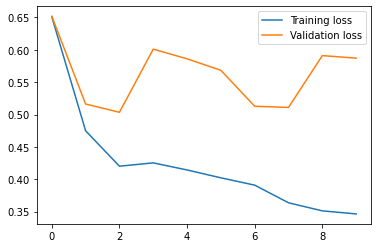

In [827]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

## DEPLOY/VERIFY

In [771]:
verificationData[0:6]

array([[-1.26630703,  1.24444513, -0.35840708,  0.72243821, -1.32656725,
        -1.03083517, -1.21612752, -1.36345268,  0.57545095,  0.41527574,
        -1.18557521],
       [-1.22645205,  0.57980409, -0.97019428,  1.32031014, -1.19761449,
        -0.94184937, -1.14075829, -1.21399632,  1.09937931,  0.49123297,
        -1.21214215],
       [-0.60474024,  2.23716839, -0.31125598,  1.00414214, -1.50302892,
        -1.11982097, -1.10307368, -1.6175285 ,  1.52143272,  0.33547258,
        -1.26475553],
       [-0.99933033,  1.92063657, -0.38333277,  0.48952913, -1.08223571,
        -0.75399046, -0.9146506 , -1.2438876 ,  0.60455808, -0.28684788,
        -1.29348761],
       [-1.58277964,  0.55901003,  0.40314197, -0.28139182, -0.60714661,
        -0.59579348, -0.99001983, -0.43682325,  0.42991529,  0.13356096,
        -1.16093011],
       [-1.64312163, -0.04940756,  0.38860198,  0.68756932, -1.06187475,
        -1.14948291, -0.87696599, -0.60122525,  1.9580397 , -0.01931498,
        -0.886

In [772]:
#Empty lists to be populated using formatted training data
verificationX = []
verificationY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


for i in range(n_past, len(verificationData) - n_future +1):
    verificationX.append(verificationData[i - n_past:i, 0:klangapiDaily.shape[1]])
    verificationY.append(verificationData[i + n_future - 1:i + n_future, 10])

verificationX, verificationY = np.array(verificationX), np.array(verificationY)

print('verificationX shape == {}.'.format(verificationX.shape))
print('verificationY shape == {}.'.format(verificationY.shape))

verificationX shape == (717, 14, 11).
verificationY shape == (717, 1).


In [773]:
verificationX[0]

array([[-1.26630703,  1.24444513, -0.35840708,  0.72243821, -1.32656725,
        -1.03083517, -1.21612752, -1.36345268,  0.57545095,  0.41527574,
        -1.18557521],
       [-1.22645205,  0.57980409, -0.97019428,  1.32031014, -1.19761449,
        -0.94184937, -1.14075829, -1.21399632,  1.09937931,  0.49123297,
        -1.21214215],
       [-0.60474024,  2.23716839, -0.31125598,  1.00414214, -1.50302892,
        -1.11982097, -1.10307368, -1.6175285 ,  1.52143272,  0.33547258,
        -1.26475553],
       [-0.99933033,  1.92063657, -0.38333277,  0.48952913, -1.08223571,
        -0.75399046, -0.9146506 , -1.2438876 ,  0.60455808, -0.28684788,
        -1.29348761],
       [-1.58277964,  0.55901003,  0.40314197, -0.28139182, -0.60714661,
        -0.59579348, -0.99001983, -0.43682325,  0.42991529,  0.13356096,
        -1.16093011],
       [-1.64312163, -0.04940756,  0.38860198,  0.68756932, -1.06187475,
        -1.14948291, -0.87696599, -0.60122525,  1.9580397 , -0.01931498,
        -0.886

In [774]:
verificationY[0]

array([-0.90588628])

In [791]:
prediction = model.predict(trainX)

In [792]:
prediction

array([[ 0.783012  ],
       [ 1.088825  ],
       [ 1.5987465 ],
       ...,
       [-0.6172783 ],
       [-0.56361234],
       [-0.550826  ]], dtype=float32)

In [793]:
prediction_copies = np.repeat(prediction, klangapiDaily.shape[1], axis=-1)
prediction_copies

array([[ 0.783012  ,  0.783012  ,  0.783012  , ...,  0.783012  ,
         0.783012  ,  0.783012  ],
       [ 1.088825  ,  1.088825  ,  1.088825  , ...,  1.088825  ,
         1.088825  ,  1.088825  ],
       [ 1.5987465 ,  1.5987465 ,  1.5987465 , ...,  1.5987465 ,
         1.5987465 ,  1.5987465 ],
       ...,
       [-0.6172783 , -0.6172783 , -0.6172783 , ..., -0.6172783 ,
        -0.6172783 , -0.6172783 ],
       [-0.56361234, -0.56361234, -0.56361234, ..., -0.56361234,
        -0.56361234, -0.56361234],
       [-0.550826  , -0.550826  , -0.550826  , ..., -0.550826  ,
        -0.550826  , -0.550826  ]], dtype=float32)

In [794]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [796]:
y_pred_future[-1]

3.6252656

In [780]:
vY = np.repeat(verificationY, klangapiDaily.shape[1], axis=-1)
vYs = scaler.inverse_transform(vY)[:,10]

In [781]:
vYs

array([ 31.667 ,  25.8402,  21.4216,  22.0399,  24.7499,  21.904 ,
        17.5103,  17.5129,  28.9737,  20.2257,  42.9524,  37.0827,
        49.7386,  37.2331,  35.9025,  23.2297,  30.758 ,  34.5008,
        27.8482,  28.6973,  26.8471,  51.6632,  29.8759,  28.9912,
        34.678 ,  32.4396,  34.4355,  31.1108,  24.3387,  63.5345,
        24.3296,  28.0132,  34.0586,  38.8308,  32.6833,  43.7591,
        31.4368,  32.0846,  42.261 ,  39.2014,  45.4342,  32.5146,
        36.516 ,  36.1686,  32.0009,  38.9094,  33.1576,  35.3691,
        33.3963,  36.107 ,  42.7536,  37.074 ,  46.8284,  47.3832,
        43.1811,  33.1291,  23.7461,  27.2878,  31.5216,  41.0788,
        41.8042,  48.3705,  66.1867,  49.7469,  68.4755,  39.6524,
        25.4945,  34.0055,  40.0723,  29.8212,  33.2452,  37.0702,
        32.9199,  42.2291,  66.8978,  28.5331,  17.9379,  23.2642,
        22.9368,  38.6187,  26.2003,  32.5196,  26.5105,  33.6385,
        30.2571,  36.5604,  36.104 ,  38.4337,  40.7715,  39.2

In [1]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(vYs,y_pred_future))

NameError: name 'vYs' is not defined

In [ ]:
#formula
#API
#Chapter 2
#Chapter 4